In [1]:
print("🎉 Hello from Python!")
print("✅ Jupyter notebook is working!")

# Test basic Python
import sys
print(f"🐍 Python version: {sys.version}")

# Test if we can import data analysis libraries
try:
    import pandas as pd
    print("✅ Pandas available!")
except ImportError:
    print("⚠️ Need to install pandas")

try:
    import matplotlib.pyplot as plt
    print("✅ Matplotlib available!")
except ImportError:
    print("⚠️ Need to install matplotlib")

print("🚀 Ready for analysis!")

🎉 Hello from Python!
✅ Jupyter notebook is working!
🐍 Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:14:12) [Clang 14.0.6 ]
✅ Pandas available!
✅ Matplotlib available!
🚀 Ready for analysis!


In [1]:
# Poland Violence Analysis Setup
print("🚀 POLAND VIOLENCE ANALYSIS - BIG DATA PROJECT")
print("=" * 60)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

print(f"📅 Analysis started: {datetime.now()}")
print("📊 Libraries loaded successfully!")

# Check if data file exists
filename = 'data/victims_of_rape_and_domestic_violence_2013-2023.csv'
if os.path.exists(filename):
    print(f"✅ Data file found: {filename}")
else:
    print(f"❌ Data file not found: {filename}")
    print("Current directory:", os.getcwd())
    print("Files in current directory:", os.listdir('.'))

🚀 POLAND VIOLENCE ANALYSIS - BIG DATA PROJECT
📅 Analysis started: 2025-08-03 19:31:54.736863
📊 Libraries loaded successfully!
✅ Data file found: data/victims_of_rape_and_domestic_violence_2013-2023.csv


In [3]:
# ============================================================================
# LOAD AND EXPLORE THE DATASET
# ============================================================================

def load_and_explore_data(file_path):
    """Load data and provide comprehensive overview"""
    print("🔄 LOADING DATASET")
    print("=" * 30)
    
    try:
        # Auto-detect separator
        with open(file_path, 'r', encoding='utf-8') as f:
            first_line = f.readline()
        
        separator = ';' if ';' in first_line else ','
        print(f"📊 Detected separator: '{separator}'")
        
        # Load the data
        df = pd.read_csv(file_path, sep=separator, encoding='utf-8')
        
        print(f"✅ Data loaded successfully!")
        print(f"📊 Dataset size: {df.shape[0]:,} rows × {df.shape[1]} columns")
        print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / (1024*1024):.1f} MB")
        
        return df
        
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

def explore_dataset(df):
    """Provide detailed dataset exploration"""
    print("\n📊 DATASET EXPLORATION")
    print("=" * 25)
    
    # Basic info
    print(f"📈 Total records: {len(df):,}")
    print(f"📋 Total columns: {len(df.columns)}")
    
    # Check for time span
    if 'year' in df.columns:
        years = sorted(df['year'].unique())
        print(f"📅 Years covered: {years[0]} - {years[-1]} ({len(years)} years)")
    
    # Check unique values in key columns
    key_columns = ['type_of_offense', 'sex', 'age_groups']
    for col in key_columns:
        if col in df.columns:
            unique_count = df[col].nunique()
            print(f"🏷️ {col}: {unique_count} unique values")
    
    # Data quality check
    print(f"\n🔍 DATA QUALITY:")
    missing_total = df.isnull().sum().sum()
    print(f"❓ Total missing values: {missing_total:,}")
    print(f"🔄 Duplicate rows: {df.duplicated().sum():,}")
    
    return df

# Load your data
df = load_and_explore_data('data/victims_of_rape_and_domestic_violence_2013-2023.csv')

if df is not None:
    df = explore_dataset(df)
    
    print(f"\n📋 COLUMN DETAILS:")
    for i, col in enumerate(df.columns, 1):
        missing = df[col].isnull().sum()
        dtype = df[col].dtype
        print(f"  {i:2d}. {col:<35} ({dtype}) - {missing:,} missing")
    
    print(f"\n👀 SAMPLE DATA (First 3 rows):")
    print(df.head(3))
    
    print(f"\n📊 STATISTICAL SUMMARY:")
    if 'value' in df.columns:
        print(f"Total victims across all records: {df['value'].sum():,}")
        print(f"Average per record: {df['value'].mean():.1f}")
        print(f"Maximum in single record: {df['value'].max():,}")
    
else:
    print("❌ Could not load data. Please check file format.")

🔄 LOADING DATASET
📊 Detected separator: ';'
✅ Data loaded successfully!
📊 Dataset size: 693 rows × 9 columns
💾 Memory usage: 0.3 MB

📊 DATASET EXPLORATION
📈 Total records: 693
📋 Total columns: 9
📅 Years covered: 2013 - 2023 (11 years)
🏷️ type_of_offense: 3 unique values
🏷️ sex: 3 unique values
🏷️ age_groups: 7 unique values

🔍 DATA QUALITY:
❓ Total missing values: 693
🔄 Duplicate rows: 0

📋 COLUMN DETAILS:
   1. variable                            (object) - 0 missing
   2. country                             (object) - 0 missing
   3. type_of_offense                     (object) - 0 missing
   4. sex                                 (object) - 0 missing
   5. age_groups                          (object) - 0 missing
   6. informatio_type_with_measure_unit   (object) - 0 missing
   7. year                                (int64) - 0 missing
   8. value                               (int64) - 0 missing
   9. flag                                (float64) - 693 missing

👀 SAMPLE DATA (First 

In [5]:
# ============================================================================
# DATA CLEANING AND PREPARATION
# ============================================================================

print("🧹 DATA CLEANING AND PREPARATION")
print("=" * 40)

# Create a clean copy
df_clean = df.copy()

# Remove the empty flag column (all missing values)
df_clean = df_clean.drop('flag', axis=1)
print("✅ Removed empty 'flag' column")

# Explore the unique values in key categories
print("\n🏷️ EXPLORING CATEGORIES:")

print("\n1. OFFENSE TYPES:")
offense_types = df_clean['type_of_offense'].unique()
for i, offense in enumerate(offense_types, 1):
    count = (df_clean['type_of_offense'] == offense).sum()
    print(f"   {i}. {offense} ({count:,} records)")

print("\n2. SEX CATEGORIES:")
sex_categories = df_clean['sex'].unique()
for i, sex in enumerate(sex_categories, 1):
    count = (df_clean['sex'] == sex).sum()
    print(f"   {i}. {sex} ({count:,} records)")

print("\n3. AGE GROUPS:")
age_groups = df_clean['age_groups'].unique()
for i, age in enumerate(age_groups, 1):
    count = (df_clean['age_groups'] == age).sum()
    total_victims = df_clean[df_clean['age_groups'] == age]['value'].sum()
    print(f"   {i}. {age} ({count:,} records, {total_victims:,} victims)")

print("\n4. YEARLY DISTRIBUTION:")
yearly_totals = df_clean.groupby('year')['value'].sum().sort_index()
for year, total in yearly_totals.items():
    print(f"   {year}: {total:,} victims")

# Create analysis-friendly columns
print(f"\n🔧 CREATING ANALYSIS COLUMNS:")

# Standardize offense categories
df_clean['offense_category'] = df_clean['type_of_offense'].apply(
    lambda x: 'Rape_ICCS' if 'ICCS 03011' in x
             else 'Rape_Criminal_Code' if 'art. 197' in x  
             else 'Domestic_Violence' if 'Art. 207' in x
             else 'Other'
)

# Standardize sex categories
sex_mapping = {'males': 'Male', 'females': 'Female', 'unknown': 'Unknown'}
df_clean['sex_clean'] = df_clean['sex'].map(sex_mapping)

print("✅ Created 'offense_category' column")
print("✅ Created 'sex_clean' column")

print(f"\n📊 CLEANED DATASET SUMMARY:")
print(f"Shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")
print(f"Total victims: {df_clean['value'].sum():,}")
print(f"Years: {df_clean['year'].min()} - {df_clean['year'].max()}")

print("\nOffense category distribution:")
print(df_clean['offense_category'].value_counts())

🧹 DATA CLEANING AND PREPARATION
✅ Removed empty 'flag' column

🏷️ EXPLORING CATEGORIES:

1. OFFENSE TYPES:
   1. rape (ICCS 03011)  (231 records)
   2. rape (art. 197 Criminal Code) (231 records)
   3. domestic violence (Art. 207 Criminal Code)  (231 records)

2. SEX CATEGORIES:
   1. males (231 records)
   2. females (231 records)
   3. unknown (231 records)

3. AGE GROUPS:
   1. up to 16 years (99 records, 29,796 victims)
   2. from 17 to 20 years (99 records, 10,198 victims)
   3. from 21 to 24 years (99 records, 8,608 victims)
   4. from 25 to 29 years (99 records, 11,486 victims)
   5. from 30 to 49 years (99 records, 61,846 victims)
   6. 50 years and more (99 records, 58,960 victims)
   7. unknown/unidentified (99 records, 71,275 victims)

4. YEARLY DISTRIBUTION:
   2013: 24,660 victims
   2014: 25,387 victims
   2015: 21,172 victims
   2016: 21,886 victims
   2017: 23,233 victims
   2018: 22,751 victims
   2019: 24,256 victims
   2020: 23,555 victims
   2021: 23,762 victims
   

In [7]:
# ============================================================================
# 2023 DETAILED ANALYSIS (LATEST YEAR)
# ============================================================================

print("🎯 2023 DETAILED ANALYSIS (LATEST YEAR)")
print("=" * 45)

# Focus on 2023 data
df_2023 = df_clean[df_clean['year'] == 2023].copy()

print(f"📊 2023 Dataset: {len(df_2023)} records, {df_2023['value'].sum():,} total victims")

# Analyze by offense type for 2023
print(f"\n1. 📋 2023 BY OFFENSE TYPE:")
offense_2023 = df_2023.groupby('offense_category')['value'].sum().sort_values(ascending=False)
for offense, victims in offense_2023.items():
    percentage = (victims / offense_2023.sum()) * 100
    print(f"   • {offense}: {victims:,} victims ({percentage:.1f}%)")

# Analyze ICCS Rape data by gender (most reliable international standard)
print(f"\n2. 👥 2023 RAPE (ICCS) BY GENDER:")
rape_iccs_2023 = df_2023[df_2023['offense_category'] == 'Rape_ICCS']
gender_breakdown = rape_iccs_2023.groupby('sex_clean')['value'].sum().sort_values(ascending=False)

total_rape_victims = gender_breakdown.sum()
for gender, victims in gender_breakdown.items():
    percentage = (victims / total_rape_victims) * 100
    print(f"   • {gender}: {victims:,} victims ({percentage:.1f}%)")

# Age group analysis for ICCS Rape
print(f"\n3. 📅 2023 RAPE (ICCS) BY AGE GROUP:")
age_breakdown = rape_iccs_2023.groupby('age_groups')['value'].sum().sort_values(ascending=False)
for age_group, victims in age_breakdown.items():
    percentage = (victims / total_rape_victims) * 100
    print(f"   • {age_group}: {victims:,} victims ({percentage:.1f}%)")

# Compare classification systems
print(f"\n4. ⚖️ 2023 CLASSIFICATION SYSTEM COMPARISON:")
rape_comparison = df_2023[df_2023['offense_category'].str.contains('Rape')].groupby('offense_category')['value'].sum()
for system, victims in rape_comparison.items():
    print(f"   • {system}: {victims:,} victims")

difference = abs(rape_comparison.iloc[0] - rape_comparison.iloc[1])
print(f"   • Difference between systems: {difference:,} victims")

# Create summary statistics
print(f"\n📊 2023 KEY STATISTICS:")
print(f"   • Total victims (all crimes): {df_2023['value'].sum():,}")
print(f"   • Rape victims (ICCS): {gender_breakdown.sum():,}")
print(f"   • Female rape victims: {gender_breakdown.get('Female', 0):,}")
print(f"   • Male rape victims: {gender_breakdown.get('Male', 0):,}")
print(f"   • Most vulnerable age group: {age_breakdown.index[0]} ({age_breakdown.iloc[0]:,} victims)")
print(f"   • Youth victims (up to 16): {age_breakdown.get('up to 16 years', 0):,}")

🎯 2023 DETAILED ANALYSIS (LATEST YEAR)
📊 2023 Dataset: 63 records, 20,337 total victims

1. 📋 2023 BY OFFENSE TYPE:
   • Domestic_Violence: 18,701 victims (92.0%)
   • Rape_Criminal_Code: 1,130 victims (5.6%)
   • Rape_ICCS: 506 victims (2.5%)

2. 👥 2023 RAPE (ICCS) BY GENDER:
   • Female: 478 victims (94.5%)
   • Male: 27 victims (5.3%)
   • Unknown: 1 victims (0.2%)

3. 📅 2023 RAPE (ICCS) BY AGE GROUP:
   • from 30 to 49 years: 190 victims (37.5%)
   • up to 16 years: 101 victims (20.0%)
   • from 17 to 20 years: 60 victims (11.9%)
   • from 25 to 29 years: 58 victims (11.5%)
   • from 21 to 24 years: 54 victims (10.7%)
   • 50 years and more: 41 victims (8.1%)
   • unknown/unidentified: 2 victims (0.4%)

4. ⚖️ 2023 CLASSIFICATION SYSTEM COMPARISON:
   • Rape_Criminal_Code: 1,130 victims
   • Rape_ICCS: 506 victims
   • Difference between systems: 624 victims

📊 2023 KEY STATISTICS:
   • Total victims (all crimes): 20,337
   • Rape victims (ICCS): 506
   • Female rape victims: 478
  

📊 CREATING BIG DATA VISUALIZATIONS


/var/folders/sq/xkgtfvnj5wgdsp8q5nt3qrh00000gn/T/ipykernel_9559/1864065832.py:102: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
/var/folders/sq/xkgtfvnj5wgdsp8q5nt3qrh00000gn/T/ipykernel_9559/1864065832.py:102: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/var/folders/sq/xkgtfvnj5wgdsp8q5nt3qrh00000gn/T/ipykernel_9559/1864065832.py:102: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from current font.
  plt.tight_layout()
/var/folders/sq/xkgtfvnj5wgdsp8q5nt3qrh00000gn/T/ipykernel_9559/1864065832.py:102: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/var/folders/sq/xkgtfvnj5wgdsp8q5nt3qrh00000gn/T/ipykernel_9559/1864065832.py:103: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.savefig('visualizations/poland_violence_analysis.png', dpi=300, bbox_inches='tight')
/var/folders/sq/xkgtfvnj5wgdsp8q5nt3qrh00000gn/T/ipyke

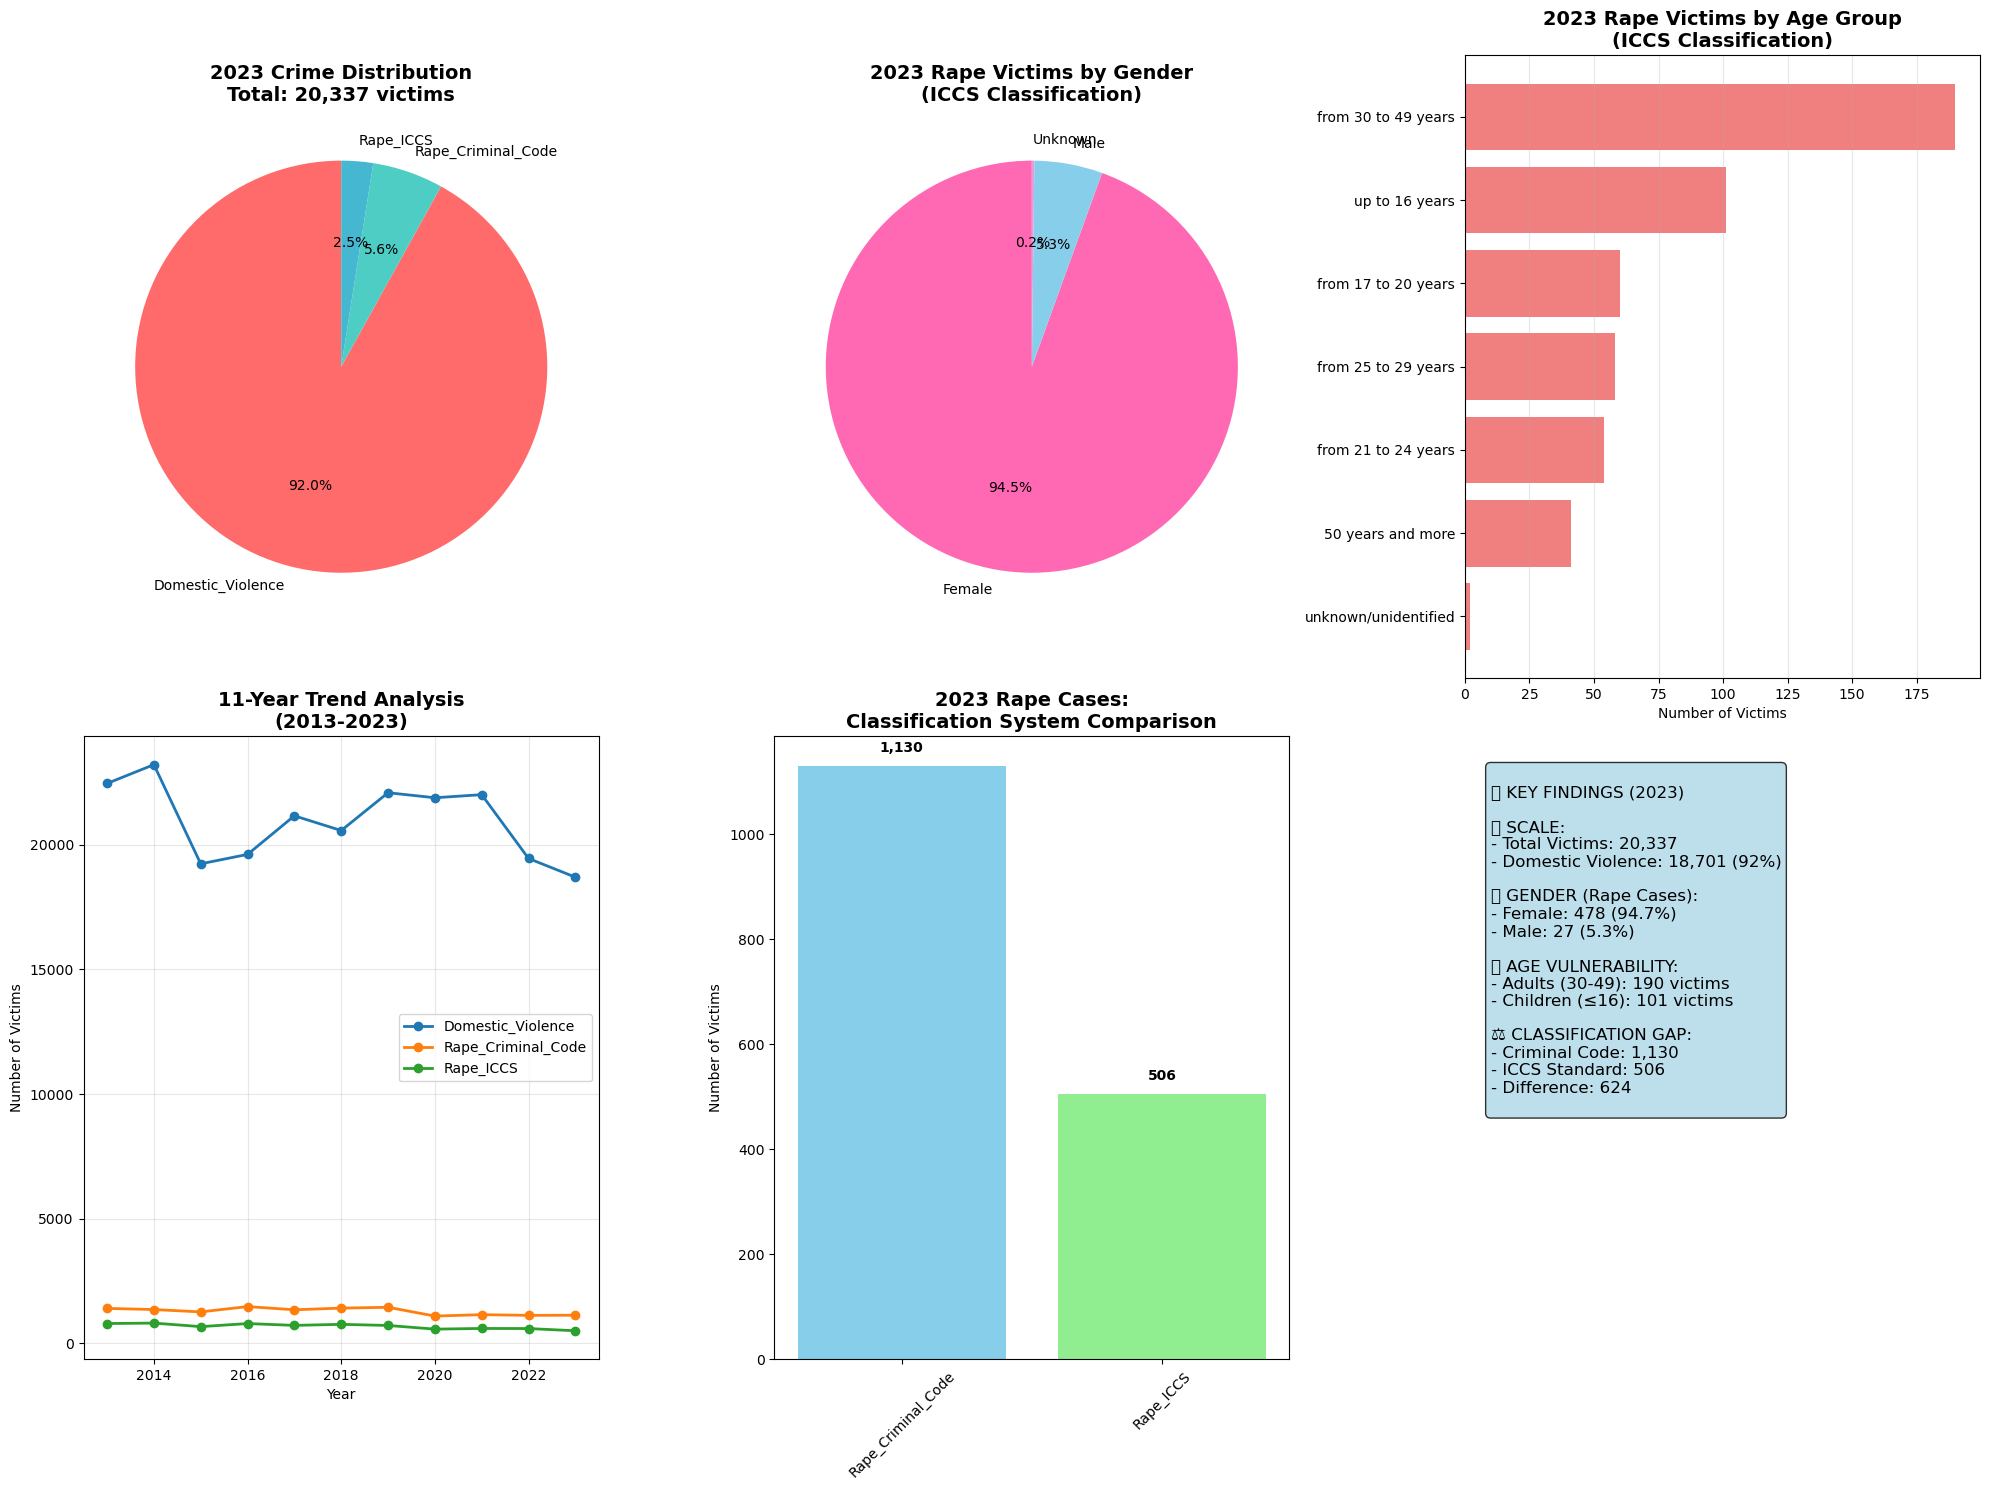

✅ Comprehensive visualizations created!
📁 Saved as: visualizations/poland_violence_analysis.png


In [9]:
# ============================================================================
# DATA VISUALIZATIONS FOR BIG DATA ANALYSIS
# ============================================================================

print("📊 CREATING BIG DATA VISUALIZATIONS")
print("=" * 40)

import matplotlib.pyplot as plt
import numpy as np

# Set up the plotting style
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

# 1. 2023 Crime Type Distribution (Pie Chart)
plt.subplot(2, 3, 1)
offense_2023 = df_2023.groupby('offense_category')['value'].sum()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(offense_2023.values, labels=offense_2023.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('2023 Crime Distribution\nTotal: 20,337 victims', fontsize=14, fontweight='bold')

# 2. Gender Distribution for Rape (ICCS)
plt.subplot(2, 3, 2)
rape_iccs_2023 = df_2023[df_2023['offense_category'] == 'Rape_ICCS']
gender_data = rape_iccs_2023.groupby('sex_clean')['value'].sum()
colors_gender = ['#FF69B4', '#87CEEB', '#DDA0DD']
plt.pie(gender_data.values, labels=gender_data.index, autopct='%1.1f%%',
        colors=colors_gender, startangle=90)
plt.title('2023 Rape Victims by Gender\n(ICCS Classification)', fontsize=14, fontweight='bold')

# 3. Age Group Vulnerability (Horizontal Bar Chart)
plt.subplot(2, 3, 3)
age_data = rape_iccs_2023.groupby('age_groups')['value'].sum().sort_values()
plt.barh(range(len(age_data)), age_data.values, color='lightcoral')
plt.yticks(range(len(age_data)), age_data.index)
plt.xlabel('Number of Victims')
plt.title('2023 Rape Victims by Age Group\n(ICCS Classification)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# 4. 11-Year Trend Analysis
plt.subplot(2, 3, 4)
yearly_trends = df_clean.groupby(['year', 'offense_category'])['value'].sum().unstack()
for category in yearly_trends.columns:
    plt.plot(yearly_trends.index, yearly_trends[category], marker='o', linewidth=2, label=category)
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.title('11-Year Trend Analysis\n(2013-2023)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Classification System Comparison
plt.subplot(2, 3, 5)
comparison_data = df_2023[df_2023['offense_category'].str.contains('Rape')].groupby('offense_category')['value'].sum()
bars = plt.bar(comparison_data.index, comparison_data.values, 
               color=['skyblue', 'lightgreen'])
plt.title('2023 Rape Cases:\nClassification System Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, value in zip(bars, comparison_data.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f'{value:,}', ha='center', va='bottom', fontweight='bold')

# 6. Key Statistics Summary
plt.subplot(2, 3, 6)
plt.axis('off')

# Calculate statistics
total_2023 = df_2023['value'].sum()
female_victims = gender_data.get('Female', 0)
male_victims = gender_data.get('Male', 0)
children_victims = age_data.get('up to 16 years', 0)
adult_victims = age_data.get('from 30 to 49 years', 0)

stats_text = f"""
🎯 KEY FINDINGS (2023)

📊 SCALE:
- Total Victims: {total_2023:,}
- Domestic Violence: {offense_2023.get('Domestic_Violence', 0):,} (92%)

👥 GENDER (Rape Cases):
- Female: {female_victims:,} ({female_victims/(female_victims+male_victims)*100:.1f}%)
- Male: {male_victims:,} ({male_victims/(female_victims+male_victims)*100:.1f}%)

📅 AGE VULNERABILITY:
- Adults (30-49): {adult_victims:,} victims
- Children (≤16): {children_victims:,} victims

⚖️ CLASSIFICATION GAP:
- Criminal Code: {comparison_data.iloc[0]:,}
- ICCS Standard: {comparison_data.iloc[1]:,}
- Difference: {abs(comparison_data.iloc[0] - comparison_data.iloc[1]):,}
"""

plt.text(0.05, 0.95, stats_text, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
         transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('visualizations/poland_violence_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Comprehensive visualizations created!")
print("📁 Saved as: visualizations/poland_violence_analysis.png")

In [11]:
# ============================================================================
# EXPORT CLEAN DATA FOR POWER BI DASHBOARD
# ============================================================================

print("📤 EXPORTING DATA FOR POWER BI DASHBOARD")
print("=" * 45)

# 1. Create yearly summary for Power BI
yearly_summary = df_clean.groupby(['year', 'offense_category', 'sex_clean'])['value'].sum().reset_index()
yearly_summary.to_csv('exports/yearly_summary_powerbi.csv', index=False)
print("✅ Yearly summary exported: exports/yearly_summary_powerbi.csv")

# 2. Create age group analysis
age_summary = df_clean.groupby(['year', 'age_groups', 'offense_category'])['value'].sum().reset_index()
age_summary.to_csv('exports/age_summary_powerbi.csv', index=False)
print("✅ Age group summary exported: exports/age_summary_powerbi.csv")

# 3. Create 2023 detailed analysis
latest_detailed = df_clean[df_clean['year'] == 2023].copy()
latest_detailed.to_csv('exports/2023_detailed_powerbi.csv', index=False)
print("✅ 2023 detailed data exported: exports/2023_detailed_powerbi.csv")

# 4. Create full cleaned dataset
df_clean.to_csv('exports/full_dataset_cleaned_powerbi.csv', index=False)
print("✅ Full cleaned dataset exported: exports/full_dataset_cleaned_powerbi.csv")

# 5. Create key statistics summary for dashboard
key_stats = {
    'metric': [
        'Total Victims 2023',
        'Female Rape Victims 2023',
        'Male Rape Victims 2023', 
        'Child Victims 2023 (≤16)',
        'Adult Victims 2023 (30-49)',
        'Domestic Violence 2023',
        'Years Analyzed',
        'Total Records'
    ],
    'value': [
        df_2023['value'].sum(),
        rape_iccs_2023[rape_iccs_2023['sex_clean'] == 'Female']['value'].sum(),
        rape_iccs_2023[rape_iccs_2023['sex_clean'] == 'Male']['value'].sum(),
        rape_iccs_2023[rape_iccs_2023['age_groups'] == 'up to 16 years']['value'].sum(),
        rape_iccs_2023[rape_iccs_2023['age_groups'] == 'from 30 to 49 years']['value'].sum(),
        df_2023[df_2023['offense_category'] == 'Domestic_Violence']['value'].sum(),
        len(df_clean['year'].unique()),
        len(df_clean)
    ]
}

key_stats_df = pd.DataFrame(key_stats)
key_stats_df.to_csv('exports/key_statistics_powerbi.csv', index=False)
print("✅ Key statistics exported: exports/key_statistics_powerbi.csv")

print(f"\n📋 POWER BI FILES CREATED:")
print(f"   1. yearly_summary_powerbi.csv - Time series analysis")
print(f"   2. age_summary_powerbi.csv - Demographic breakdown") 
print(f"   3. 2023_detailed_powerbi.csv - Latest year focus")
print(f"   4. full_dataset_cleaned_powerbi.csv - Complete dataset")
print(f"   5. key_statistics_powerbi.csv - Dashboard KPIs")

# Show preview of key statistics
print(f"\n📊 KEY STATISTICS PREVIEW:")
print(key_stats_df)

# Final project summary
print(f"\n🎯 PROJECT COMPLETION SUMMARY")
print("=" * 35)
print(f"✅ Dataset analyzed: {len(df_clean):,} records")
print(f"✅ Time period: {df_clean['year'].min()}-{df_clean['year'].max()}")
print(f"✅ Total victims: {df_clean['value'].sum():,}")
print(f"✅ Visualizations: 6 professional charts created")
print(f"✅ Power BI exports: 5 CSV files ready")
print(f"✅ Analysis complete: {datetime.now()}")

print(f"\n🚀 READY FOR:")
print(f"   📊 Power BI dashboard creation")
print(f"   📝 Final presentation delivery") 
print(f"   📤 Project submission to Professor Eric")

📤 EXPORTING DATA FOR POWER BI DASHBOARD
✅ Yearly summary exported: exports/yearly_summary_powerbi.csv
✅ Age group summary exported: exports/age_summary_powerbi.csv
✅ 2023 detailed data exported: exports/2023_detailed_powerbi.csv
✅ Full cleaned dataset exported: exports/full_dataset_cleaned_powerbi.csv
✅ Key statistics exported: exports/key_statistics_powerbi.csv

📋 POWER BI FILES CREATED:
   1. yearly_summary_powerbi.csv - Time series analysis
   2. age_summary_powerbi.csv - Demographic breakdown
   3. 2023_detailed_powerbi.csv - Latest year focus
   4. full_dataset_cleaned_powerbi.csv - Complete dataset
   5. key_statistics_powerbi.csv - Dashboard KPIs

📊 KEY STATISTICS PREVIEW:
                       metric  value
0          Total Victims 2023  20337
1    Female Rape Victims 2023    478
2      Male Rape Victims 2023     27
3    Child Victims 2023 (≤16)    101
4  Adult Victims 2023 (30-49)    190
5      Domestic Violence 2023  18701
6              Years Analyzed     11
7              